In [ ]:
import importlib
import NIR_processing
importlib.reload(NIR_processing)
import NIR_processing as nir

import config as cfg

In [ ]:
metadata,data_nir = nir.data_import(cfg.DATA_FILE)
metadata_info = nir.metadata_summary(cfg.FORMULATION,metadata)

                       Formulation  N of samples  by operator 1  by operator 2
S3                     Sucrose 3%w            59             22             37
S6                     Sucrose 6%w            91             91              0
S9                     Sucrose 9%w            36              8             28
SA05  Sucrose 6%w + arginine 0.5%w            31              8             23
SA1     Sucrose 6%w + arginine 1%w            32              5             27
SA3     Sucrose 6%w + arginine 3%w            31              9             22
SA6                  Trehalose 6%w            25             25              0


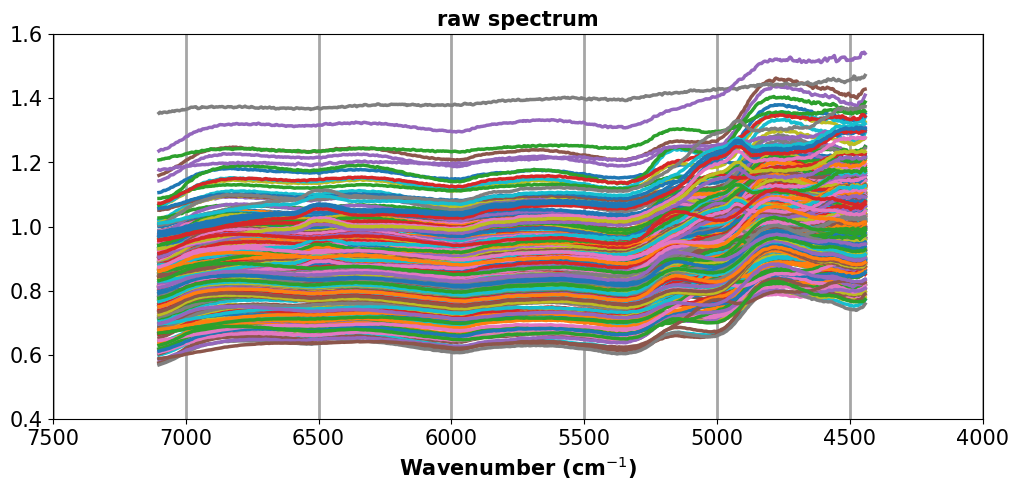

In [ ]:
nir.plot_spectrum(metadata,data_nir,'raw spectrum')

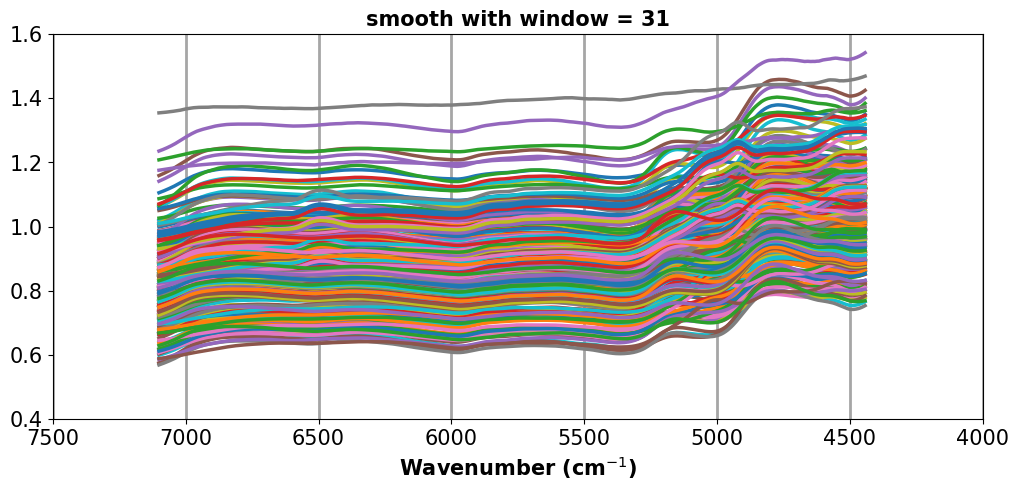

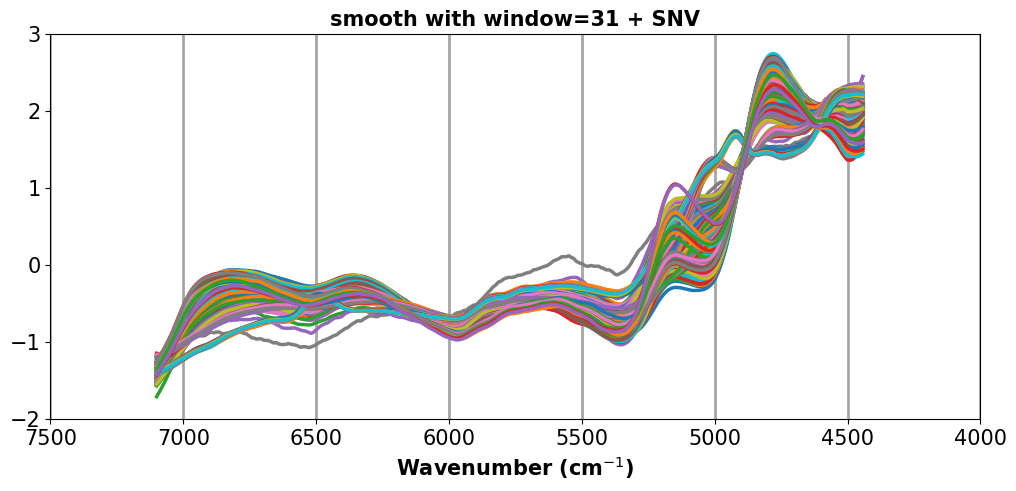

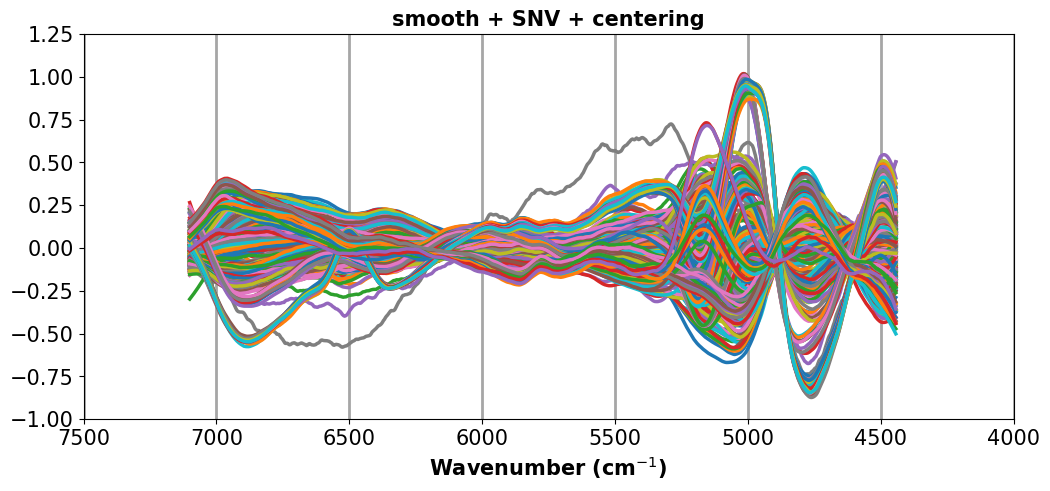

In [ ]:
processed = nir.preprocessing_pipeline(metadata,data_nir)

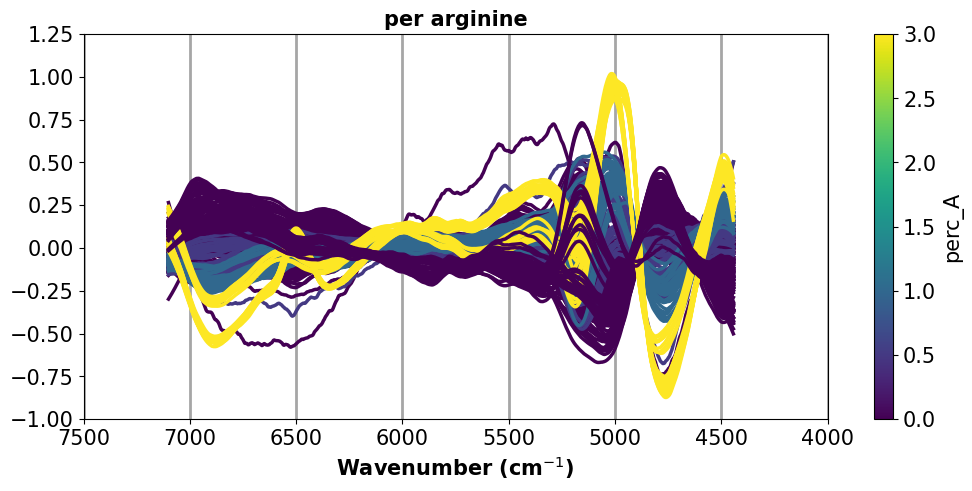

In [ ]:
nir.plot_spectrum(metadata,processed,'per arginine',colorby='perc_A')

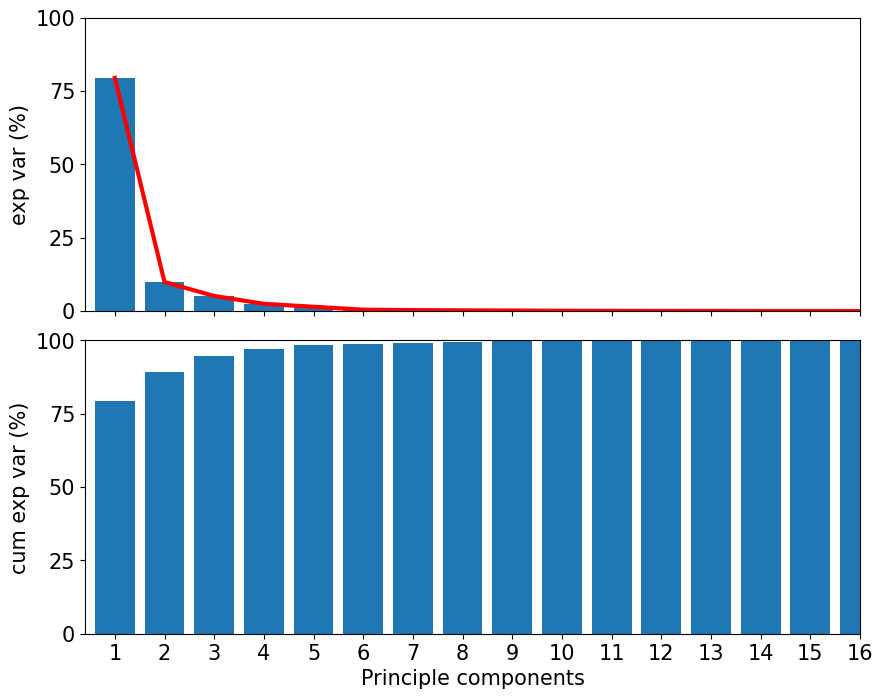

In [ ]:
nir.pca_hyper(processed)

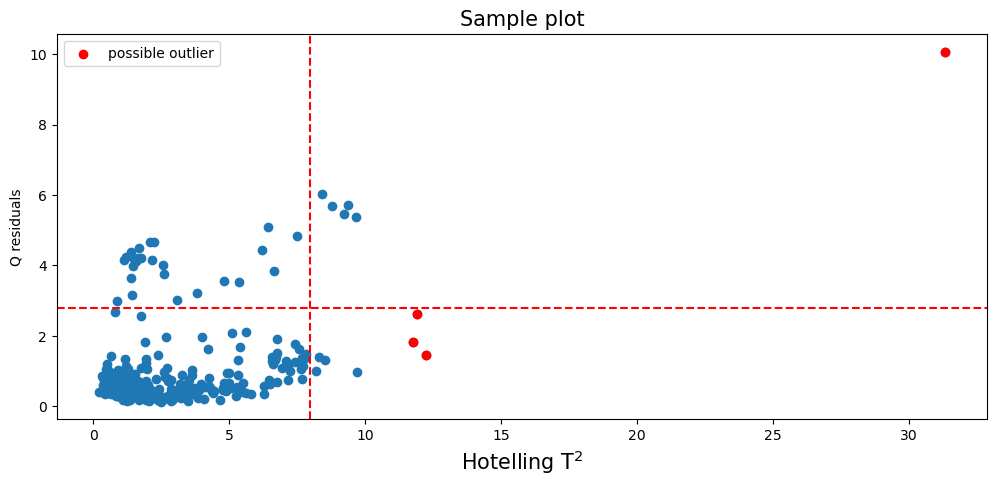

In [ ]:
dist_df,score,loading = nir.Q_T2_outlier_detect(processed,3,95,99)

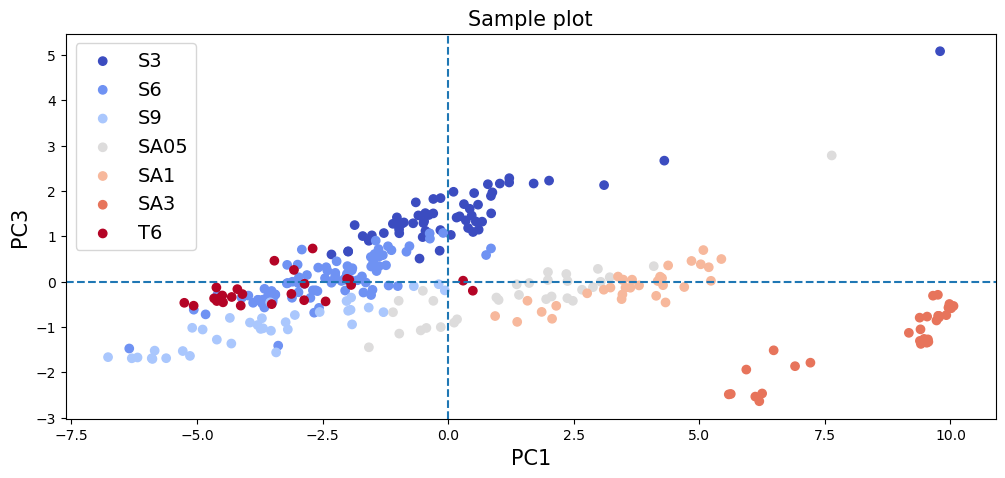

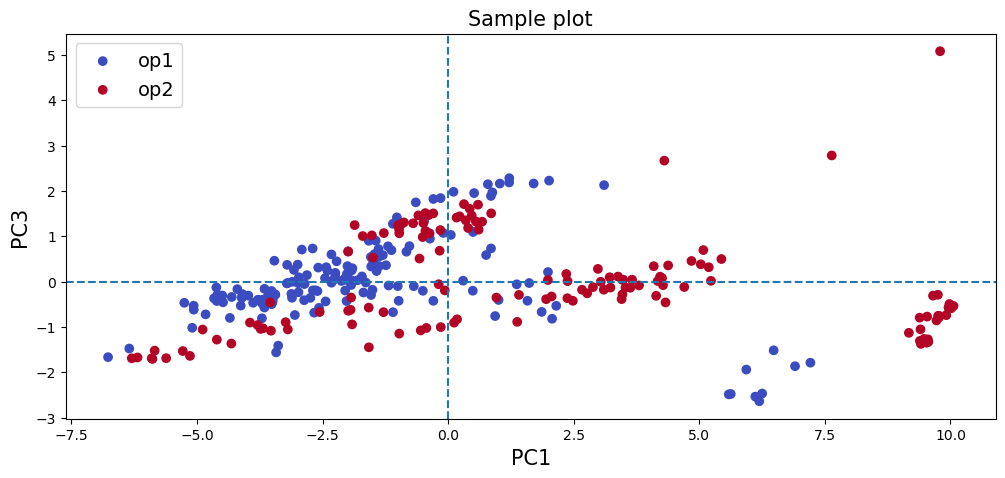

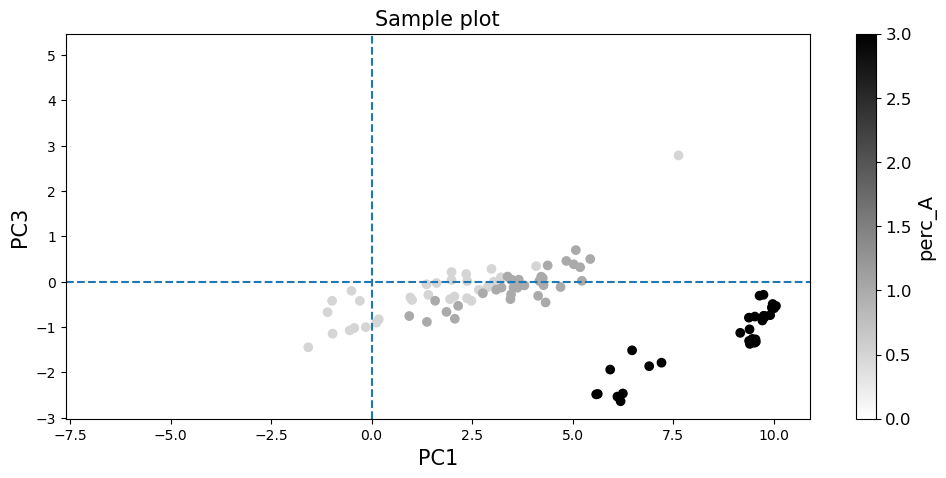

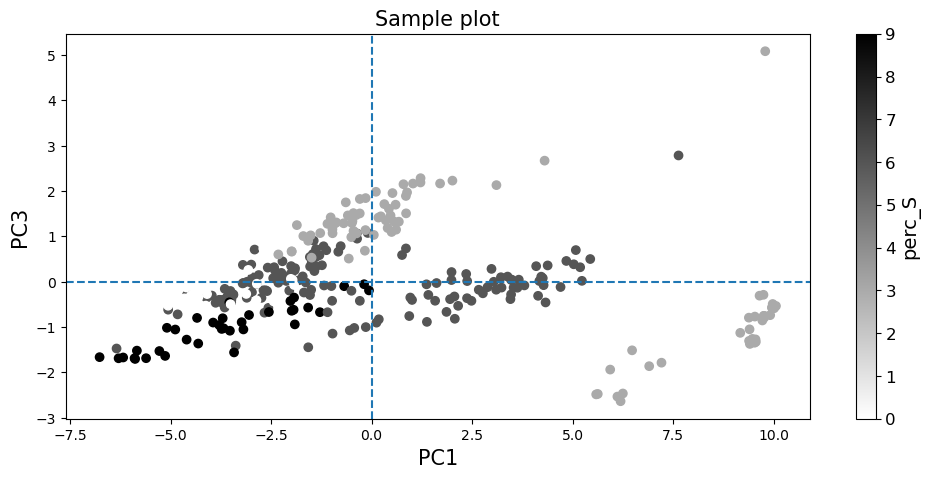

In [ ]:
nir.sample_plot(metadata,score,'Type',True)
nir.sample_plot(metadata,score,'Operator',True)
nir.sample_plot(metadata,score,'perc_A',False)
nir.sample_plot(metadata,score,'perc_S',False)

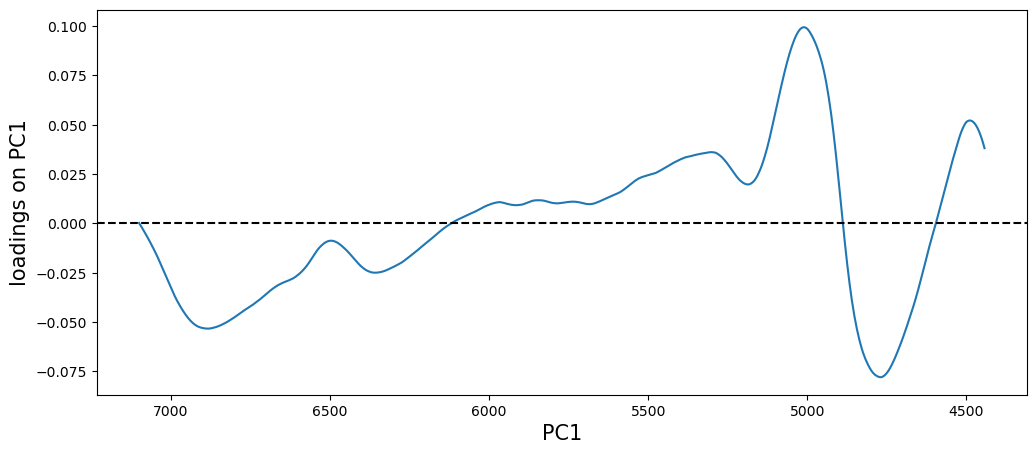

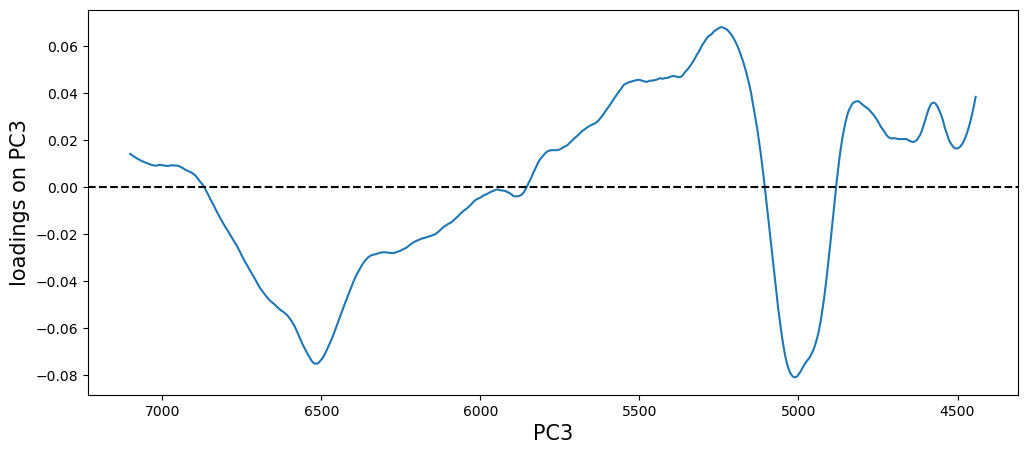

In [ ]:
nir.loading_plot(processed,loading,'PC1')
nir.loading_plot(processed,loading,'PC3')

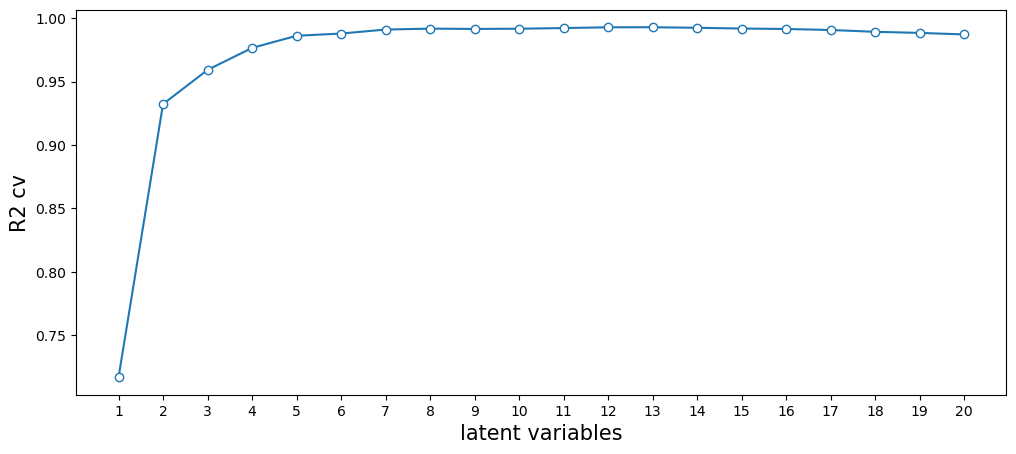

In [ ]:
score_percA = nir.optimum_variables(processed.values,metadata['perc_A'].values,20)

In [ ]:
pls_A = nir.PLS(n_components=2)
pls_A.fit(processed.values,metadata['perc_A'])

PLSRegression()

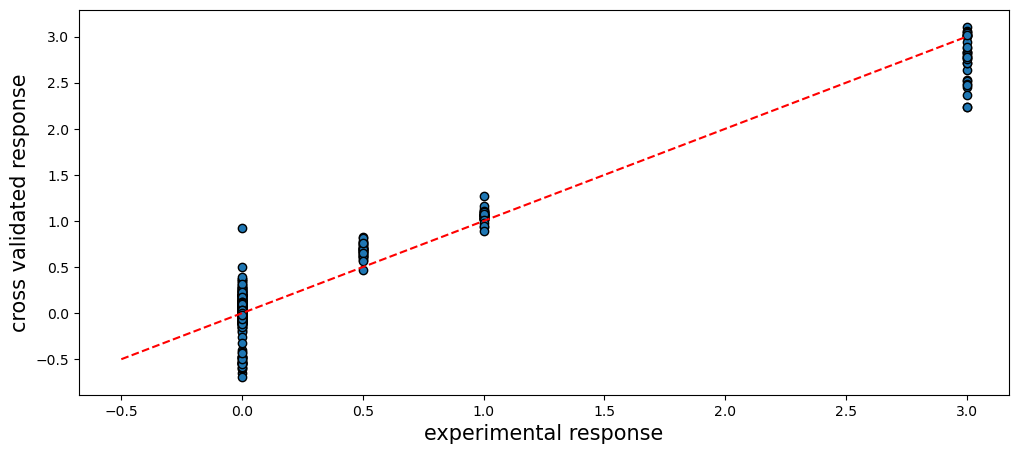

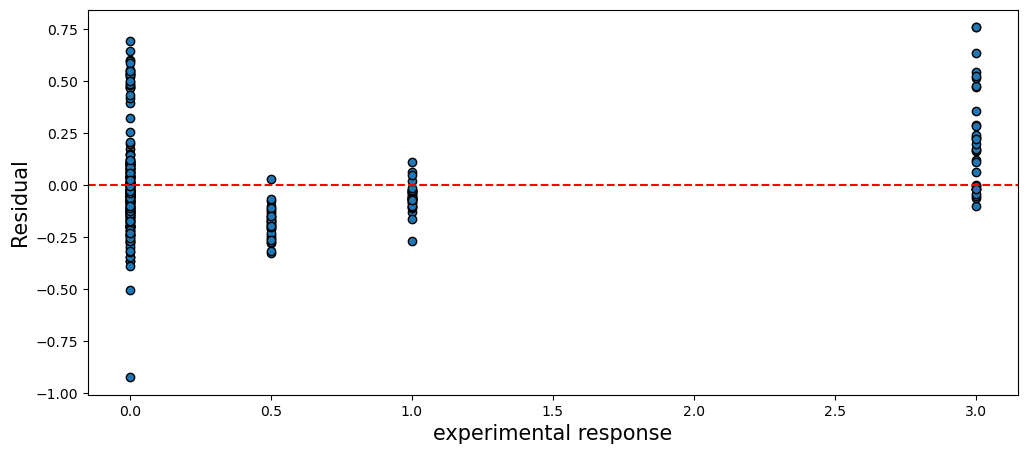

In [ ]:
nir.prediction(pls_A,metadata,processed,'perc_A',lb = -0.5,ub=3)